## Governing Equation for Discretized Water Flow in a Porous Medium

The equation below encapsulates the fundamental mechanisms governing the transient behavior of water flow in a discretized porous medium:

\begin{equation}
\underbrace{\Big[\Phi_{\text{ref}} V \left( \frac{\partial m_\phi(p)}{\partial p} b(p) + m_\phi(p) \frac{\partial b(p)}{\partial p} \right) \frac{dp}{dt} \Big]_i}_{\text{Transient term in block }i, \, \left[\frac{m^3}{s} \right]}
+ \underbrace{\sum_{j \in C(i)} \left[ \left[b(p) \lambda m_T(p) \right]_i T_{ij} (p_{i} - p_{j}) \right]}_{\text{Flow between connected blocks}, \, \left[\frac{m^3}{s} \right]}
+ \underbrace{T_{w,i}M_{i} (p_i - p_{bhp,w})}_{\text{Inflow into well within block }i, \, \left[\frac{m^3}{s} \right]} = 0
\end{equation}


### Initial Conditions

The system initiates with a constant pressure $ p_i = \text{const} $ across all cells $i$.

### Nomenclature with Units
- $ \Phi_{\text{ref,i}} $: Reference porosity in cell $i$, assumed constant. [Dimensionless]
- $ V_i $: Volume of cell $i$, assumed constant. [$m^3$]
- $ m_{\phi,i} $: Pore volume multiplier as a function of pressure in cell $i$. [Dimensionless]
- $ b_i $: Formation volume factor, which relates reservoir volume to surface volume; a function of pressure. [$m^3/m^3$]
- $ C(i) $: Set of cells connected to cell $i$. [Set]
- $ \lambda $: Mobility of the water phase. [$m^2/(Pa \cdot s)$]
- $ m_{T,i} $: Transmissibility multiplier, a function of pressure in cell $i$. [Dimensionless]
- $ T_{ij} $: Transmissibility factor between cells $i$ and $j$. [$m^2/(Pa \cdot s)$]
- $ p_i $: Pressure in cell $i$. [$Pa$]
- $ T_{w,i} $: Transmissibility of the well connection in cell $i$. [$m^2/(Pa \cdot s)$]
- $ M_{i} $: Mobility of the water phase in well connection at cell $i$. [$m^2/(Pa \cdot s)$]
- $ p_{bhp,w} $: Bottomhole pressure of the well, if present. [$Pa$]


### 1. Transient Term in Block $i$

$$
\underbrace{\Big[\Phi_{\text{ref}} V \left( \frac{\partial m_\phi(p)}{\partial p} b(p) + m_\phi(p) \frac{\partial b(p)}{\partial p} \right) \frac{dp}{dt} \Big]_i}_{\text{Transient term in block }i, \, \left[\frac{m^3}{s} \right]}
$$

**Explanation:**

This term captures the change in water volume within a grid block as time progresses. It is termed as the 'transient' term because it accounts for the time-varying accumulation or depletion of water within the cell. Specifically:

- $ \Phi_{\text{ref}} $: Reference porosity defines the initial proportion of the volume in the rock that is occupied by the fluid. It represents the inherent porosity of the rock.
  
- $ V $: Volume of the grid cell. This, in combination with porosity, gives us the total pore volume.

- $ m_\phi(p) $: This is the pore volume multiplier. It gives the change in pore volume due to pressure changes. The derivative $\frac{\partial m_\phi(p)}{\partial p}$ gives the rate of change of this multiplier with respect to pressure, showing how sensitive the pore volume is to pressure changes.

- $ b(p) $: This is the formation volume factor. It tells us how much volume a given amount of water at reservoir conditions would occupy at the surface. Its derivative $\frac{\partial b(p)}{\partial p}$ gives the rate of change of the formation volume factor with pressure.

- $ \frac{dp}{dt} $: This represents the rate of change of pressure with time in the grid block.

Combining these components, this term provides the rate of change of water volume in the grid cell with time, incorporating the effects of porosity, pore volume changes due to pressure, and formation volume factor changes.

---

### 2. Flow Between Connected Blocks

$$
\underbrace{\sum_{j \in C(i)} \left[ \left[b(p) \lambda m_T(p) \right]_i T_{ij} (p_{i} - p_{j}) \right]}_{\text{Flow between connected blocks}, \, \left[\frac{m^3}{s} \right]}
$$

**Explanation:**

This term models the flow of water between neighboring grid blocks. The flow is driven by pressure differences between the blocks and is moderated by the transmissibility between them. Specifically:

- $ \lambda $: This is the mobility of the water phase, which indicates how easily the water can flow. It's a combination of permeability and viscosity.

- $ m_T(p) $: This is the transmissibility multiplier, which can vary with pressure.

- $ T_{ij} $: This represents the transmissibility between blocks $i$ and $j$. It encapsulates the inherent ability of the two blocks to transmit fluid between them based on the properties of the rock and fluid.

- $ (p_{i} - p_{j}) $: The pressure difference between blocks $i$ and $j$. The flow is from a region of higher pressure to a region of lower pressure.

---

### 3. Inflow Into Well Within Block $i$

$$
\underbrace{T_{w,i}M_{i} (p_i - p_{bhp,w})}_{\text{Inflow into well within block }i, \, \left[\frac{m^3}{s} \right]}
$$

**Explanation:**

This term models the inflow (or outflow) of water to (or from) a well that is connected to block $i$. The flow is driven by the pressure difference between the block and the well's bottomhole pressure. Specifically:

- $ T_{w,i} $: Transmissibility of the well connection in block $i$. It represents the capacity of the wellbore in that block to allow fluid flow.

- $ M_{i} $: Mobility of the water phase in the well connection at block $i$.

- $ (p_i - p_{bhp,w}) $: The pressure difference between the grid block $i$ and the bottomhole pressure of the well. The fluid will flow into or out of the well based on this difference.


## Explicit Schema

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

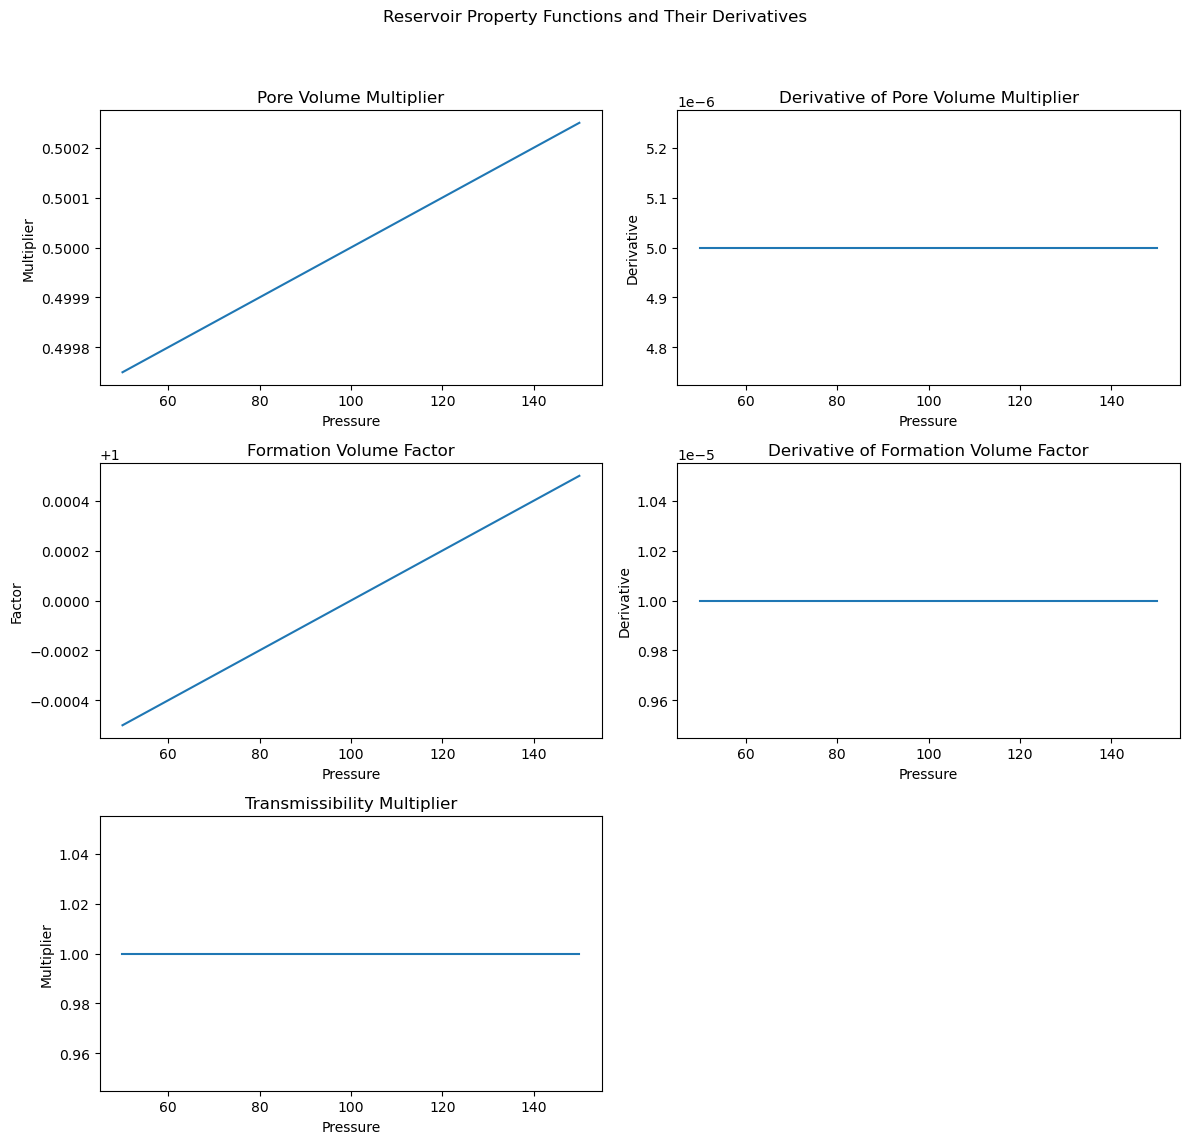

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100
cell_volume = 0.5
V = cell_volume  # A single representative volume
p0 = 100.0  # A single representative initial pressure
compressibility = 1e-5
pressure_range = np.linspace(50, 150, 500)  # Pressure from 50 to 150 units

# Function definitions (from your code)
def pore_volume_multiplier(p, dp=False):
    if dp:
        return compressibility * V
    else:
        return V * (1 + compressibility * (p - p0))

def formation_volume_factor(p, dp=False):
    if dp:
        return compressibility
    else:
        return 1 + compressibility * (p - p0)

def transmissibility_multiplier(p, dp=False):
    return np.ones_like(p)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Reservoir Property Functions and Their Derivatives')

# Pore Volume Multiplier
axs[0, 0].plot(pressure_range, pore_volume_multiplier(pressure_range))
axs[0, 0].set_title('Pore Volume Multiplier')
axs[0, 0].set_xlabel('Pressure')
axs[0, 0].set_ylabel('Multiplier')
axs[0, 1].plot(pressure_range, [pore_volume_multiplier(p, dp=True) for p in pressure_range])
axs[0, 1].set_title('Derivative of Pore Volume Multiplier')
axs[0, 1].set_xlabel('Pressure')
axs[0, 1].set_ylabel('Derivative')

# Formation Volume Factor
axs[1, 0].plot(pressure_range, formation_volume_factor(pressure_range))
axs[1, 0].set_title('Formation Volume Factor')
axs[1, 0].set_xlabel('Pressure')
axs[1, 0].set_ylabel('Factor')
axs[1, 1].plot(pressure_range, [formation_volume_factor(p, dp=True) for p in pressure_range])
axs[1, 1].set_title('Derivative of Formation Volume Factor')
axs[1, 1].set_xlabel('Pressure')
axs[1, 1].set_ylabel('Derivative')

# Transmissibility Multiplier
axs[2, 0].plot(pressure_range, transmissibility_multiplier(pressure_range))
axs[2, 0].set_title('Transmissibility Multiplier')
axs[2, 0].set_xlabel('Pressure')
axs[2, 0].set_ylabel('Multiplier')
axs[2, 1].axis('off')  # Empty since the function is currently a constant

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Total inflow into the well after 0.10000000000007934 seconds is -0.454608565359757


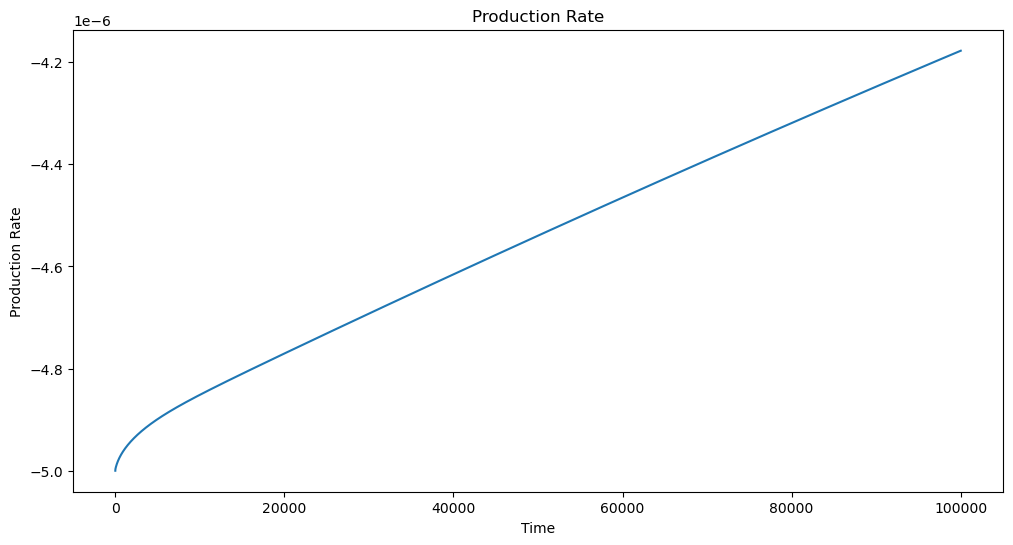

In [2]:


# Initialize parameters
n = 100  # Number of grid cells
cell_volume = 0.5  # Cell volume
poro = np.ones(n) * 0.3  # Porosity
V = np.ones(n) * cell_volume  # Volume
lam = 1.0  # Mobility
p0 = np.full(n, 10000.0)  # Initial pressure

# Well information
w = np.zeros(n)
w[5] = 1
well_mobility = np.ones(n) * 0.5
well_transmissibility = np.ones(n) * 0.001

# Compressibility and other factors
compressibility = 1e-5  # Compressibility term

# Connectivity Matrix
T = np.zeros((n, n))
np.fill_diagonal(T[:-1, 1:], 1)
np.fill_diagonal(T[1:, :-1], 1)

# Update pressure
def update_pressure(p, A, B, C, dt):
    epsilon = 1e-9
    A_reg = A + np.eye(A.shape[0]) * epsilon
    try:
        dpt = np.linalg.solve(A_reg, -B - C)
    except np.linalg.LinAlgError as e:
        print("Matrix is singular:", e)
        return p
    return p + dt * dpt


# Initialize total inflow
total_inflow = 0

# Time-stepping
dt = 1e-6  # Time step
p = p0.copy()  # Current pressure
t = 0  # Current time

prod_rate = []
for k in range(1000):
    A = np.diag(poro * pore_volume_multiplier(p, dp=True) * formation_volume_factor(p) + 
                poro * pore_volume_multiplier(p) * formation_volume_factor(p, dp=True))
    
    pi_pj = p[:, None] - p
    B = np.sum(T * formation_volume_factor(p) * lam * transmissibility_multiplier(p) * pi_pj, axis=1)
    
    pbhp = p.copy()
    pbhp[5] = 0
    C = well_mobility * well_transmissibility * (p - pbhp)
    
    # Update inflow for the well
    q = - well_mobility[5] * well_transmissibility[5] * (p[5] - pbhp[5])
    total_inflow += q * dt
    prod_rate.append(q*dt)
    
    p = update_pressure(p, A, B, C, dt)
    t += dt

print("Total inflow into the well after {} seconds is {}".format(t, total_inflow))

# plot prod_rate with title and xlabel and ylabel
fig = plt.figure(figsize=(12, 6))
plt.plot(prod_rate)
plt.title('Production Rate')
plt.xlabel('Time')
plt.ylabel('Production Rate')
plt.show()


## Implicit Schema

Switching from an explicit to an implicit scheme often results in a set of algebraic equations that you'll need to solve at each time step. In the context of reservoir simulations, using implicit methods is generally done by adopting a fully implicit or implicitly coupled approach to solve the flow and pressure equations. This leads to a non-linear equation system in most cases, which you'll have to solve using iterative methods such as Newton-Raphson.

### Step-by-Step: Implementing an Implicit Scheme
1. **Discretize the Governing Equation**: Write down the governing equation in its continuous form and discretize it to obtain a discrete form suitable for an implicit scheme. The temporal derivative will usually be expressed as $ \frac{{p^{n+1} - p^n}}{\Delta t} $, where $ p^{n+1} $ is the unknown you'll be solving for.

2. **Assemble the Equation System**: Put the discretized equations into matrix form, which will generally yield a non-linear equation system of the form $ F(p^{n+1}) = 0 $.

3. **Jacobian Matrix**: Compute the Jacobian matrix of $ F $, which is a matrix where the entry $ (i,j) $ is $ \frac{\partial F_i}{\partial p^{n+1}_j} $. This is essential for applying the Newton-Raphson method.

4. **Initial Guess**: You'll need an initial guess to start the Newton-Raphson iterations. The pressure field from the previous time step is usually a good starting point.

5. **Newton-Raphson Iteration**: At each time step, use Newton-Raphson to iteratively solve the non-linear equation system. This involves repeatedly solving a linear equation system of the form $ J \Delta p = -F(p) $ and updating the pressure field $ p = p + \Delta p $ until $ F(p) $ is sufficiently close to zero.

6. **Time Stepping**: Once you've obtained the new pressure field $ p^{n+1} $, advance to the next time step and repeat the process.

7. **Boundary and Well Conditions**: Make sure to integrate any well or boundary conditions into your equation system appropriately.

8. **Numerical Stability and Convergence**: Implicit methods are generally unconditionally stable with respect to the time step size, but the Newton-Raphson method may still fail to converge for various reasons. You may need to implement additional checks or employ techniques like damping to ensure convergence.

### Mathematical Formulation
In LaTeX, the Newton-Raphson update step can be written as:
$$
J \Delta p = -F(p)
$$
$$
p \leftarrow p + \Delta p
$$
where $ J $ is the Jacobian matrix, $ \Delta p $ is the update to the pressure field, and $ F(p) $ is the function representing your discretized governing equations.

Here is the pseudocode snippet for the Newton-Raphson loop:
```python
# Newton-Raphson Loop
for t in time_steps:
    p_new = p_old  # Initial guess
    for i in range(max_iterations):
        F, J = evaluate_F_and_J(p_new)
        delta_p = np.linalg.solve(J, -F)
        p_new += delta_p
        if np.linalg.norm(F, 2) < tolerance:
            break
    p_old = p_new
```

## Governing Equation for Discretized Water Flow in a Porous Medium

The equation below encapsulates the fundamental mechanisms governing the transient behavior of water flow in a discretized porous medium:

\begin{equation}
\underbrace{\Big[\Phi_{\text{ref}} V \left( \frac{\partial m_\phi(p)}{\partial p} b(p) + m_\phi(p) \frac{\partial b(p)}{\partial p} \right) \frac{dp}{dt} \Big]_i}_{\text{Transient term in block }i, \, \left[\frac{m^3}{s} \right]}
+ \underbrace{\sum_{j \in C(i)} \left[ \left[b(p) \lambda m_T(p) \right]_i T_{ij} (p_{i} - p_{j}) \right]}_{\text{Flow between connected blocks}, \, \left[\frac{m^3}{s} \right]}
+ \underbrace{T_{w,i}M_{i} (p_i - p_{bhp,w})}_{\text{Inflow into well within block }i, \, \left[\frac{m^3}{s} \right]} = 0
\end{equation}


### Initial Conditions

The system initiates with a constant pressure $ p_i = \text{const} $ across all cells $i$.

### Nomenclature with Units
- $ \Phi_{\text{ref,i}} $: Reference porosity in cell $i$, assumed constant. [Dimensionless]
- $ V_i $: Volume of cell $i$, assumed constant. [$m^3$]
- $ m_{\phi,i} $: Pore volume multiplier as a function of pressure in cell $i$. [Dimensionless]
- $ b_i $: Formation volume factor, which relates reservoir volume to surface volume; a function of pressure. [$m^3/m^3$]
- $ C(i) $: Set of cells connected to cell $i$. [Set]
- $ \lambda $: Mobility of the water phase. [$m^2/(Pa \cdot s)$]
- $ m_{T,i} $: Transmissibility multiplier, a function of pressure in cell $i$. [Dimensionless]
- $ T_{ij} $: Transmissibility factor between cells $i$ and $j$. [$m^2/(Pa \cdot s)$]
- $ p_i $: Pressure in cell $i$. [$Pa$]
- $ T_{w,i} $: Transmissibility of the well connection in cell $i$. [$m^2/(Pa \cdot s)$]
- $ M_{i} $: Mobility of the water phase in well connection at cell $i$. [$m^2/(Pa \cdot s)$]
- $ p_{bhp,w} $: Bottomhole pressure of the well, if present. [$Pa$]


Your discretized equation for water flow in a porous medium seems to be comprehensive and consistent with petroleum engineering principles. The equation accounts for transient terms, interblock flow terms, and wellbore influx terms, incorporating important properties like formation volume factor, transmissibility multiplier, and pore volume multiplier, which are functions of pressure.

### First Step: Formulating Residuals for Newton-Raphson Method
The first step for converting the problem to an implicit method involves formulating the residuals for the Newton-Raphson method. Essentially, the residual for each block $ i $ is just the left-hand side of your governing equation set to zero:

$$
R_i(p) = \Phi_{\text{ref}} V \left( \frac{\partial m_\phi(p)}{\partial p} b(p) + m_\phi(p) \frac{\partial b(p)}{\partial p} \right) \frac{dp}{dt} + \sum_{j \in C(i)} \left[ b(p) \lambda m_T(p) \right]_i T_{ij} (p_i - p_j) + T_{w,i}M_{i} (p_i - p_{bhp,w}) = 0
$$

The goal is to find $ p $ such that $ R(p) = 0 $.

### Implicit Formulation: Time Discretization
In an implicit scheme, you'll evaluate the properties at the new time level. To discretize the transient term implicitly in time, you could use:

$$
\frac{dp}{dt} \approx \frac{p^{n+1} - p^n}{\Delta t}
$$

where $ n+1 $ and $ n $ denote the new and old time levels, respectively, and $ \Delta t $ is the time step. Insert this into your equation and solve for $ p^{n+1} $, treating $ p^n $ as known.

### Jacobian Matrix
In addition to the residuals, you'll need the Jacobian matrix for the Newton-Raphson method. The element $ J_{ij} $ is the partial derivative $ \frac{\partial R_i}{\partial p_j} $.

Once you have the residual and Jacobian functions, you can use a Newton-Raphson solver to find $ p $ such that $ R(p) = 0 $.

Would you like further guidance on implementing the Newton-Raphson solver for your problem?

Iteration 0
Converged at iteration 1
Iteration 1
Converged at iteration 1
Iteration 2
Converged at iteration 1
Iteration 3
Converged at iteration 1
Iteration 4
Converged at iteration 1
Iteration 5
Converged at iteration 1
Iteration 6
Converged at iteration 1
Iteration 7
Converged at iteration 1
Iteration 8
Converged at iteration 1
Iteration 9
Converged at iteration 1


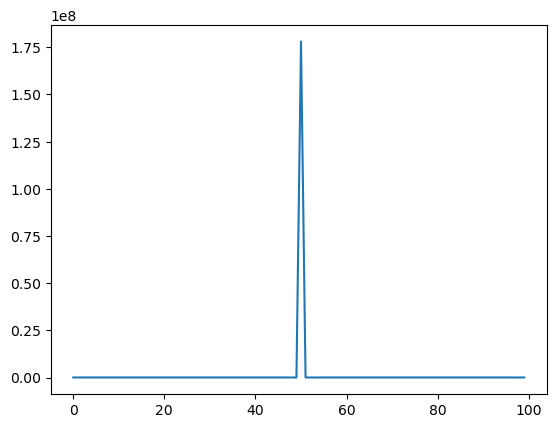

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Constants
P_MAX = 10000.0
COMPRESSIBILITY = 1e-5
cell_volume = 0.5
n = 100
well_loc = 50
poro = torch.ones(n) * 0.3
V = torch.ones(n) * cell_volume
lam = 1.0
dt = 0.01
well_mobility = torch.ones(n) * 0.5
well_transmissibility = torch.ones(n) * 0.001

# Initial pressure
p_new = torch.full((n,), P_MAX, dtype=torch.float64, requires_grad=True)

# Connectivity Matrix
T = torch.zeros((n, n), dtype=torch.float64)
T[:-1, 1:] = 1
T[1:, :-1] = 1

# Functions
def pore_volume_multiplier(p, V):
    return V * (1 + COMPRESSIBILITY * (p - P_MAX))

def formation_volume_factor(p):
    return 1 + COMPRESSIBILITY * (p - P_MAX)

def transmissibility_multiplier(p):
    return torch.ones_like(p)

def governing_eqn(p_new, p_old, poro, V, lam, T, well_mobility, well_transmissibility):
    A = torch.diag(poro * pore_volume_multiplier(p_old, V) * formation_volume_factor(p_old))
    B = torch.sum(T * formation_volume_factor(p_old) * lam * transmissibility_multiplier(p_old) * (p_old[:, None] - p_old), dim=1)
    pbhp = p_old.clone().detach()
    pbhp[well_loc] = 0
    C = well_mobility * well_transmissibility * (p_old - pbhp)
    R = torch.matmul(A, p_new-p_old) / dt + B + C
    return R

def compute_jacobian(inputs):
    jacobian = torch.autograd.functional.jacobian(lambda x: governing_eqn(x, p_old, poro, V, lam, T, well_mobility, well_transmissibility), inputs)
    return jacobian

# Newton-Raphson loop
max_iter = 100
tolerance = 1e-6

# p_old = p_new.clone().detach().requires_grad_(False)  # Attach gradients

for k in range(10):
    print(f"Iteration {k}")
    p_old = p_new.clone().detach().requires_grad_(False)
    for i in range(max_iter):
        if p_new.grad is not None:
            p_new.grad.zero_()
            
        R = governing_eqn(p_new, p_old, poro, V, lam, T, well_mobility, well_transmissibility)
        R_sum = R.sum()
        R_sum.backward()

        J_full = compute_jacobian(p_new)
        delta_p = torch.linalg.solve(J_full, -R.unsqueeze(1))
        with torch.no_grad():
            p_new += delta_p.flatten()

        if torch.norm(R, p=2) < tolerance:
            print(f"Converged at iteration {i}")
            break

        # p_old = p_new.detach().clone().requires_grad_()
plt.plot(p_new.detach().numpy())

In [16]:
p_new.max()

tensor(1.7798e+08, dtype=torch.float64, grad_fn=<MaxBackward1>)